**Desafio 1 do Modulo 1  realizado no Bootcamp Machine Learning do IGTI**

Importando as bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importando o dataset com o Pandas

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Science/IGTI Bootcamp/Modulo 1/Desafio 1/comp_bikes_mod.csv')

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


### No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

17379 linhas e 17 colunas

In [ ]:
df.shape

(17379, 17)

### Quantos tipos diferentes de dados existem no dataset do desafio?

Existem 2 tipos: Float64 e Object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.2+ MB


### Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?

Existe 10% de valores nulos

In [ ]:
df.isnull().sum() / len(df) * 100

instant       10.108049
dteday         0.000000
season        10.101656
yr            10.005754
mnth          10.095262
hr            10.056902
holiday       10.005754
weekday        9.992967
workingday     9.871492
weathersit     9.992967
temp          10.069689
atemp         10.005754
hum           10.044115
windspeed      9.967393
casual        10.037721
registered     9.916246
cnt            9.986574
dtype: float64

### Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

15641 linhas e 17 colunas 

In [ ]:
df.dropna(subset=['dteday'],inplace=True)

In [ ]:
df.shape

(15641, 17)

### Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

A média é de 0,496 

In [ ]:
df['temp'].mean()

0.4970615689533976

### Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

Desvio padrão de 0,122

In [ ]:
df['windspeed'].std()

0.12218831459766737

### Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

A coluna possui 4 categorias

In [ ]:
df['season'].value_counts()

3.0    4032
2.0    3970
4.0    3827
1.0    3812
Name: season, dtype: int64

### Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

A ultima data é 2012-12-31 

In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
df['dteday'].describe()

count                   15641
unique                    731
top       2012-11-28 00:00:00
freq                       24
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

### Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

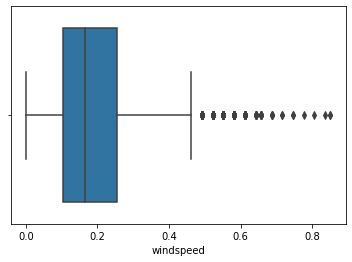

In [ ]:
sns.boxplot(x='windspeed', data=df)

### Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

Possuem baixa correlação linear negativa. 

In [ ]:
df[["season", "temp", "atemp","windspeed",'cnt',"hum"]].corr()

,season,temp,atemp,windspeed,cnt,hum
season,1.000000,0.310685,0.318424,-0.147692,0.173586,0.149990
temp,0.310685,1.000000,0.987693,-0.015241,0.408528,-0.066523
atemp,0.318424,0.987693,1.000000,-0.056203,0.404709,-0.052469
windspeed,-0.147692,-0.015241,-0.056203,1.000000,0.093503,-0.292366
cnt,0.173586,0.408528,0.404709,0.093503,1.000000,-0.323834
hum,0.149990,-0.066523,-0.052469,-0.292366,-0.323834,1.000000


### Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

R2 = 0.40 

In [ ]:
df['hum'].fillna(df['hum'].mean(), inplace = True)
df['cnt'].fillna(df['cnt'].mean(), inplace = True)
df['casual'].fillna(df['casual'].mean(), inplace = True)

In [ ]:
X= df[["hum", "casual"]]
y= df['cnt']

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
y_pred = lr.predict(X)

In [ ]:
r2_score(y, y_pred)

0.40561165206692495

### Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

R2 = 0,70 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
pred = dtr.predict(X)

In [ ]:
r2_score(y, pred)

0.6973174287156154

### Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

O valor obtido pela árvore de decisão como regressor apresenta maior R2 

### Comparando o SVM com a árvore de decisão é CORRETO afirmar:

SVM encontra o hiperplano que gera a maior separação entre os dados.

### Com base na árvore de decisão é CORRETO afirmar:

Pode ser utilizada para classificação e regressão. 